In [21]:
import os
import cv2
import matplotlib.pyplot as plt
from glob import glob

# Paths to your folders (update as needed)
raw_folder = r"Datasets\Raw_Images"
reference_folder = r"Datasets\Reference_Images"

# Get all raw image paths
raw_paths = sorted(glob(os.path.join(raw_folder, "*.tiff")))
ref_paths = sorted(glob(os.path.join(reference_folder, "*.jpeg")))  # or "*.png"

# Sanity check
print(f"Found {len(raw_paths)} raw images and {len(ref_paths)} reference images")


Found 35 raw images and 35 reference images


In [22]:
# Load one image pair for demo
raw_path = raw_paths[0]
ref_path = ref_paths[0]

# Load raw image (16-bit) and reference
raw_16bit = cv2.imread(raw_path, cv2.IMREAD_UNCHANGED)
reference_img = cv2.imread(ref_path, cv2.IMREAD_UNCHANGED)

print("Raw image shape:", raw_16bit.shape)
print("Data type:", raw_16bit.dtype)

Raw image shape: (4418, 4418)
Data type: uint16


In [23]:
def normalize_to_8bit(img):
    norm_img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
    return norm_img.astype(np.uint8)

def apply_clahe(img_8bit):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(img_8bit)

# Preprocessing pipeline
raw_8bit = normalize_to_8bit(raw_16bit)
clahe_img = apply_clahe(raw_8bit)
ref_8bit = normalize_to_8bit(reference_img)


In [ ]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 4, 1)
plt.imshow(raw_16bit, cmap='gray')
plt.title("Raw 16-bit Image")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(raw_8bit, cmap='gray')
plt.title("Normalized 8-bit")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(clahe_img, cmap='gray')
plt.title("CLAHE Enhanced")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(ref_8bit, cmap='gray')
plt.title("Reference Image")
plt.axis('off')

plt.suptitle("Preprocessing Pipeline Comparison", fontsize=16)
plt.tight_layout()
plt.show()


In [29]:
# You can also try adaptive or Otsu's thresholding
_, binary_thresh = cv2.threshold(clahe_img, 10, 255, cv2.THRESH_BINARY)


In [30]:
# Find contours in the thresholded image
contours, _ = cv2.findContours(binary_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a copy of the original CLAHE image
detected_img = cv2.cvtColor(clahe_img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(detected_img, contours, -1, (0, 255, 0), 1)

print(f"Number of objects detected: {len(contours)}")


Number of objects detected: 4806


In [31]:
centroids = []
for cnt in contours:
    M = cv2.moments(cnt)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        centroids.append((cX, cY))
        cv2.circle(detected_img, (cX, cY), 3, (0, 0, 255), -1)


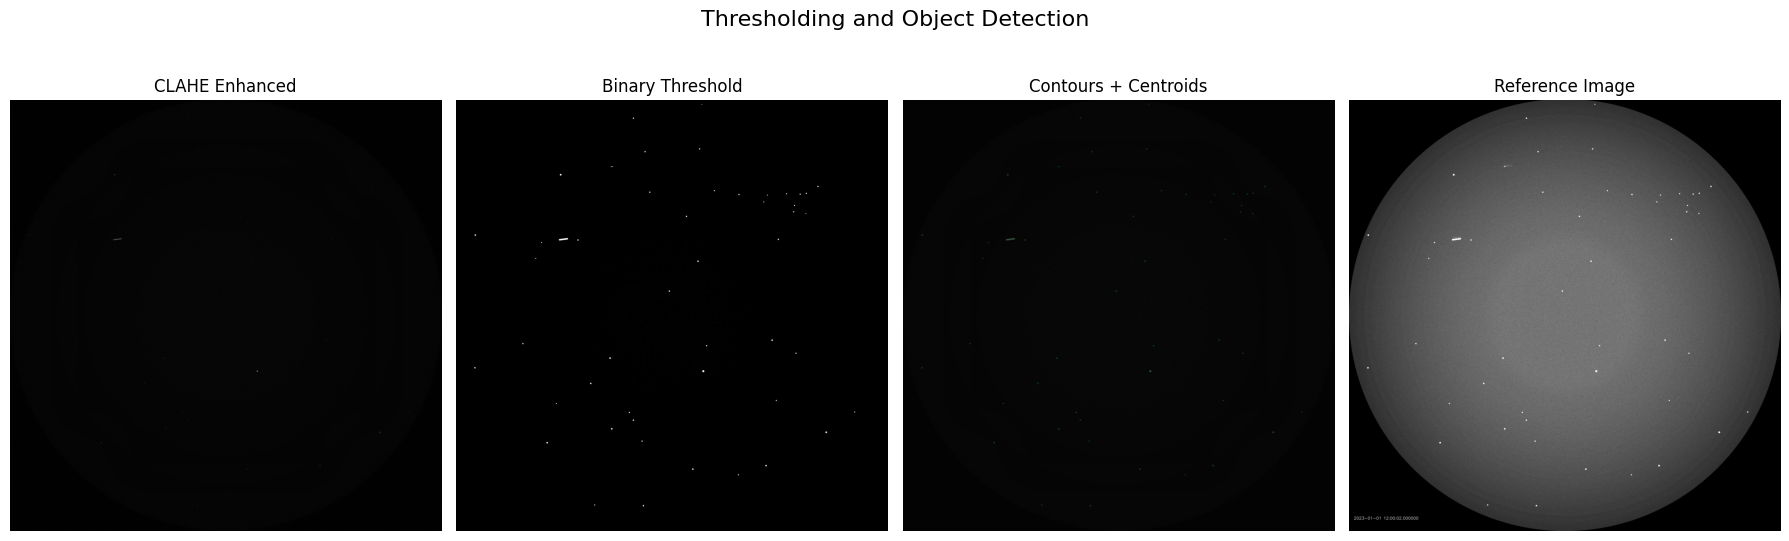